# Anaysis flow

- Prepare csv file
- Data cleaning / data preprocessing / Data exploration
- Model building
- Model evaluation
- Result visualization
- Next candidates suggestion

# Data cleaning / data preprocessing / Data exploration

Import all necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import copy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go

plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'Microsoft JhengHei', 'PMingLiU', 'Arial Unicode MS', 'SimHei']  # Pick whichever is available for traditional chinese characters
# plt.rcParams['axes.unicode_minus'] = False  # Show minus sign properly

Import data by pandas

In [3]:
df_exp = pd.read_csv('/Users/leo/Desktop/Project/ITRI_case/itri_analysis_result/dataset/experiment.csv')
df_fac = pd.read_csv('/Users/leo/Desktop/Project/ITRI_case/itri_analysis_result/dataset/factory.csv')

Previewing dataset

In [4]:
df_exp.head()

,反應器規格_mL,pc_白色防雲處理料源,pc_塊料,pc_透明料,pc_前三者混合,pc_黑色料,pc_彩色料,Methanol,Ethanol,ethylene glycol,...,反應時間[hr],備註,轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[g],產率[%],純度[%]
0,500,50.0,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,...,1.0,防雲處理料源,99.000,97.985,2.015,0,44.64,43.26,0.97,99.045
1,500,NaN,50.0,NaN,NaN,NaN,NaN,50.0,NaN,NaN,...,1.0,塊料,99.000,97.584,2.416,0,44.64,42.95,0.96,99.214
2,500,NaN,NaN,60.0,NaN,NaN,NaN,60.0,NaN,NaN,...,1.0,透明料,99.000,98.140,1.860,0,53.85,51.02,0.95,99.155
3,500,NaN,NaN,NaN,50.0,NaN,NaN,NaN,50.0,NaN,...,20.0,前三者混合,99.000,98.225,1.775,0,44.64,43.05,0.96,99.112
4,500,NaN,NaN,NaN,50.0,NaN,NaN,NaN,50.0,NaN,...,20.0,base,50.254,95.485,4.515,0,44.64,NaN,NaN,NaN


In [5]:
df_fac.head()

,反應器規格[mL],pc_白色防雲處理料源,pc_塊料,pc_透明料,pc_前三者混合,pc_黑色料,pc_彩色料,Methanol,Ethanol,ethylene glycol,...,反應時間[hr],備註,轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[kg],產率[%],純度[%]
0,50000,NaN,NaN,NaN,5.00,NaN,NaN,5.00,NaN,NaN,...,2.0,甲醇/水再結晶,99,98.227,1.773,0.000,4.32,2.00,0.46,99.999
1,200000,NaN,NaN,NaN,35.00,NaN,NaN,34.92,NaN,NaN,...,1.5,甲醇/水反沉澱,99,98.010,1.990,0.000,30.28,29.00,0.96,99.200
2,200000,NaN,NaN,NaN,34.96,NaN,NaN,35.16,NaN,NaN,...,0.5,甲醇/水反沉澱,99,97.878,2.122,0.000,30.28,28.52,0.94,99.055
3,200000,NaN,NaN,NaN,35.00,NaN,NaN,35.00,NaN,NaN,...,1.5,甲醇/水反沉澱,99,97.867,2.133,0.000,30.28,28.52,0.94,99.287
4,200000,NaN,NaN,NaN,35.64,NaN,NaN,35.00,NaN,NaN,...,2.0,乙酸乙酯/正己烷反沉澱\n反應失敗，BPA訊號處有另一產物,99,73.556,2.151,24.293,NaN,NaN,NaN,74.589


*Findings*
- The unit of 理論產物重 in exp tabel might be "g"?

Filling Nan with 0

- Assume all Nan values can be set to 0 execpt for '理論產物重[kg]', '實際產物重[g]', '產率[%]', '純度[%]' in 分析規格

In [6]:
df_exp.loc[:, :'未知產物[%]'] = df_exp.loc[:, :'未知產物[%]'].fillna(0)
df_fac.loc[:, :'未知產物[%]'] = df_fac.loc[:, :'未知產物[%]'].fillna(0)

Check info (Nan values and data type of each column)

In [7]:
df_exp.iloc[:, :15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   反應器規格_mL          20 non-null     int64  
 1   pc_白色防雲處理料源       20 non-null     float64
 2   pc_塊料             20 non-null     float64
 3   pc_透明料            20 non-null     float64
 4   pc_前三者混合          20 non-null     float64
 5   pc_黑色料            20 non-null     float64
 6   pc_彩色料            20 non-null     float64
 7   Methanol          20 non-null     float64
 8   Ethanol           20 non-null     float64
 9   ethylene glycol   20 non-null     float64
 10  propylene glycol  20 non-null     float64
 11  Tetrahydrofuran   20 non-null     int64  
 12  sodium hydroxide  20 non-null     float64
 13  Sodium ethoxide   20 non-null     float64
 14  Water             20 non-null     int64  
dtypes: float64(12), int64(3)
memory usage: 2.5 KB


In [8]:
df_exp.iloc[:, 15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Acetic acid                20 non-null     float64
 1   反應溫度[degC]                 20 non-null     int64  
 2   反應時間[hr]                   20 non-null     float64
 3   備註                         20 non-null     object 
 4   轉化率[%]                     20 non-null     float64
 5   選擇率[%]                     20 non-null     float64
 6   副產物_4-tert-butylphenol[%]  20 non-null     float64
 7   未知產物[%]                    20 non-null     int64  
 8   理論產物重[kg]                  20 non-null     float64
 9   實際產物重[g]                   18 non-null     float64
 10  產率[%]                      18 non-null     float64
 11  純度[%]                      18 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 2.0+ KB


In [9]:
df_fac.iloc[:, :15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   反應器規格[mL]         9 non-null      int64  
 1   pc_白色防雲處理料源       9 non-null      float64
 2   pc_塊料             9 non-null      float64
 3   pc_透明料            9 non-null      float64
 4   pc_前三者混合          9 non-null      float64
 5   pc_黑色料            9 non-null      float64
 6   pc_彩色料            9 non-null      float64
 7   Methanol          9 non-null      float64
 8   Ethanol           9 non-null      float64
 9   ethylene glycol   9 non-null      float64
 10  propylene glycol  9 non-null      float64
 11  Tetrahydrofuran   9 non-null      float64
 12  sodium hydroxide  9 non-null      float64
 13  Sodium ethoxide   9 non-null      float64
 14  Water             9 non-null      int64  
dtypes: float64(13), int64(2)
memory usage: 1.2 KB


In [10]:
df_fac.iloc[:, 15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Acetic acid                9 non-null      float64
 1   反應溫度[degC]                 9 non-null      float64
 2   反應時間[hr]                   9 non-null      float64
 3   備註                         9 non-null      object 
 4   轉化率[%]                     9 non-null      int64  
 5   選擇率[%]                     9 non-null      float64
 6   副產物_4-tert-butylphenol[%]  9 non-null      float64
 7   未知產物[%]                    9 non-null      float64
 8   理論產物重[kg]                  8 non-null      float64
 9   實際產物重[kg]                  8 non-null      float64
 10  產率[%]                      8 non-null      float64
 11  純度[%]                      9 non-null      float64
dtypes: float64(10), int64(1), object(1)
memory usage: 992.0+ bytes


Check summary statistic

In [11]:
df_exp.describe()

,反應器規格_mL,pc_白色防雲處理料源,pc_塊料,pc_透明料,pc_前三者混合,pc_黑色料,pc_彩色料,Methanol,Ethanol,ethylene glycol,...,反應溫度[degC],反應時間[hr],轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[g],產率[%],純度[%]
count,20.000000,20.00000,20.00000,20.000000,20.000000,20.0,20.00000,20.000000,20.000000,20.00000,...,20.0,20.000000,20.000000,20.000000,20.000000,20.0,20.0000,18.000000,18.000000,18.000000
mean,950.000000,2.50000,2.50000,3.000000,89.750000,0.0,2.50000,83.000000,7.500000,2.50000,...,65.0,3.550000,94.324500,97.745600,2.254400,0.0,85.2765,82.310000,0.858333,98.762111
std,1385.070775,11.18034,11.18034,13.416408,142.726409,0.0,11.18034,144.335136,18.317377,11.18034,...,0.0,7.095032,14.405376,0.645104,0.645104,0.0,123.5187,128.593721,0.158495,0.622536
min,500.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,...,65.0,0.500000,50.254000,95.485000,1.710000,0.0,44.6400,24.050000,0.540000,97.156000
25%,500.000000,0.00000,0.00000,0.000000,50.000000,0.0,0.00000,37.500000,0.000000,0.00000,...,65.0,0.500000,99.000000,97.539500,1.839250,0.0,44.6400,36.712500,0.822500,98.525250
50%,500.000000,0.00000,0.00000,0.000000,50.000000,0.0,0.00000,50.000000,0.000000,0.00000,...,65.0,0.500000,99.000000,97.979500,2.020500,0.0,44.6400,41.730000,0.935000,99.034500
75%,500.000000,0.00000,0.00000,0.000000,53.575000,0.0,0.00000,50.000000,0.000000,0.00000,...,65.0,1.000000,99.000000,98.160750,2.460500,0.0,44.6400,43.207500,0.960000,99.133750
max,5000.000000,50.00000,50.00000,60.000000,500.000000,0.0,50.00000,500.000000,50.000000,50.00000,...,65.0,20.000000,99.000000,98.290000,4.515000,0.0,446.4000,437.520000,0.990000,99.489000


In [12]:
df_fac.describe()

,反應器規格[mL],pc_白色防雲處理料源,pc_塊料,pc_透明料,pc_前三者混合,pc_黑色料,pc_彩色料,Methanol,Ethanol,ethylene glycol,...,反應溫度[degC],反應時間[hr],轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[kg],產率[%],純度[%]
count,9.000000e+00,9.0,9.0,9.0,9.000000,9.0,9.0,9.000000,9.0,9.0,...,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,9.000000
mean,3.833333e+05,0.0,0.0,0.0,45.073333,0.0,0.0,44.407778,0.0,0.0,...,63.255556,1.388889,99.0,95.270222,2.030556,2.699222,39.470000,29.996250,0.812500,96.713444
std,6.082763e+05,0.0,0.0,0.0,44.211376,0.0,0.0,44.266443,0.0,0.0,...,2.963997,0.485913,0.0,8.144336,0.162821,8.097667,40.935542,22.168866,0.193003,8.304078
min,5.000000e+04,0.0,0.0,0.0,5.000000,0.0,0.0,5.000000,0.0,0.0,...,60.000000,0.500000,99.0,73.556000,1.773000,0.000000,4.320000,2.000000,0.460000,74.589000
25%,2.000000e+05,0.0,0.0,0.0,34.960000,0.0,0.0,30.000000,0.0,0.0,...,60.200000,1.000000,99.0,97.867000,1.981000,0.000000,25.950000,23.980000,0.760000,99.137000
50%,2.000000e+05,0.0,0.0,0.0,35.000000,0.0,0.0,35.000000,0.0,0.0,...,63.400000,1.500000,99.0,97.945000,2.055000,0.000000,30.280000,26.960000,0.880000,99.287000
75%,2.000000e+05,0.0,0.0,0.0,35.060000,0.0,0.0,35.000000,0.0,0.0,...,65.000000,1.500000,99.0,98.019000,2.133000,0.000000,30.280000,28.640000,0.945000,99.657000
max,2.000000e+06,0.0,0.0,0.0,160.000000,0.0,0.0,159.590000,0.0,0.0,...,69.100000,2.000000,99.0,98.227000,2.267000,24.293000,138.420000,80.290000,0.980000,99.999000


In [13]:
# Select columns that includs number
numeric_df_exp = df_exp.select_dtypes(include='number')
numeric_df_fac = df_fac.select_dtypes(include='number')

Low Variance Filter

In [14]:
thresheld = 0.1  # Setting a variance threshold to decide which columns to keep

data = copy(numeric_df_exp.loc[:, :'反應時間[hr]']) # Only check X variables
var = data.var() # Get variance
X_col = data.columns
variable = X_col[var >=thresheld] # Find columns to keep where the variance is equal to or greater than the threshold
X_exp = data[variable]

data = copy(numeric_df_fac.loc[:, :'反應時間[hr]']) #only check X variables
var = data.var()
X_col = data.columns
variable = X_col[var >=thresheld] #find columns to keep
X_fac = data[variable]

In [15]:
X_exp

,反應器規格_mL,pc_白色防雲處理料源,pc_塊料,pc_透明料,pc_前三者混合,pc_彩色料,Methanol,Ethanol,ethylene glycol,propylene glycol,Tetrahydrofuran,sodium hydroxide,Sodium ethoxide,Water,Acetic acid,反應時間[hr]
0,500,50.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,100,1.0,0.0,100,1.0,1.0
1,500,0.0,50.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,100,1.0,0.0,100,1.0,1.0
2,500,0.0,0.0,60.0,0.0,0.0,60.0,0.0,0.0,0.0,120,1.2,0.0,120,1.2,1.0
3,500,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,100,1.0,0.0,100,1.0,20.0
4,500,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,100,3.0,1.0,100,4.0,20.0
5,500,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,100,3.0,4.0,100,7.0,20.0
6,5000,0.0,0.0,0.0,500.0,0.0,500.0,0.0,0.0,0.0,1000,10.0,0.0,1000,10.0,0.5
7,5000,0.0,0.0,0.0,500.0,0.0,500.0,0.0,0.0,0.0,1000,10.0,0.0,1000,10.0,0.5
8,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,100,1.0,0.0,100,1.0,0.5
9,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,100,1.0,0.0,100,1.0,0.5


In [16]:
X_fac

,反應器規格[mL],pc_前三者混合,Methanol,Tetrahydrofuran,sodium hydroxide,Water,Acetic acid,反應溫度[degC],反應時間[hr]
0,50000,5.00,5.00,10.00,100.00,10,170.00,60.1,2.0
1,200000,35.00,34.92,68.08,700.00,35,700.00,65.0,1.5
2,200000,34.96,35.16,70.00,700.00,35,1012.70,69.1,0.5
3,200000,35.00,35.00,70.00,700.00,35,700.00,60.2,1.5
4,200000,35.64,35.00,70.04,700.23,0,1012.56,63.0,2.0
5,200000,35.06,35.00,70.02,700.00,0,1165.80,63.4,1.5
6,200000,35.00,30.00,60.00,600.18,0,902.43,63.5,1.0
7,200000,30.00,30.00,60.00,600.02,0,1061.43,65.0,1.5
8,2000000,160.00,159.59,319.71,3200.11,0,4296.50,60.0,1.0


In [17]:
# Pairplot for first few main outcome variables and main reactants/conditions
# exp_eda_columns = ['pc_前三者混合', 'Methanol', 'Tetrahydrofuran', 'sodium hydroxide', 'Water', 'Acetic acid ', '反應溫度[degC]', '反應時間[hr]', '轉化率[%]', '選擇率[%]', '副產物_4-tert-butylphenol[%]', '理論產物重[kg]', '實際產物重[g]', '產率[%]', '純度[%]']

In [18]:
df_exp = pd.concat([X_exp, numeric_df_exp.loc[:, '轉化率[%]':]], axis=1)
df_fac = pd.concat([X_fac, numeric_df_fac.loc[:, '轉化率[%]':]], axis=1)

Pairplot to check distribution

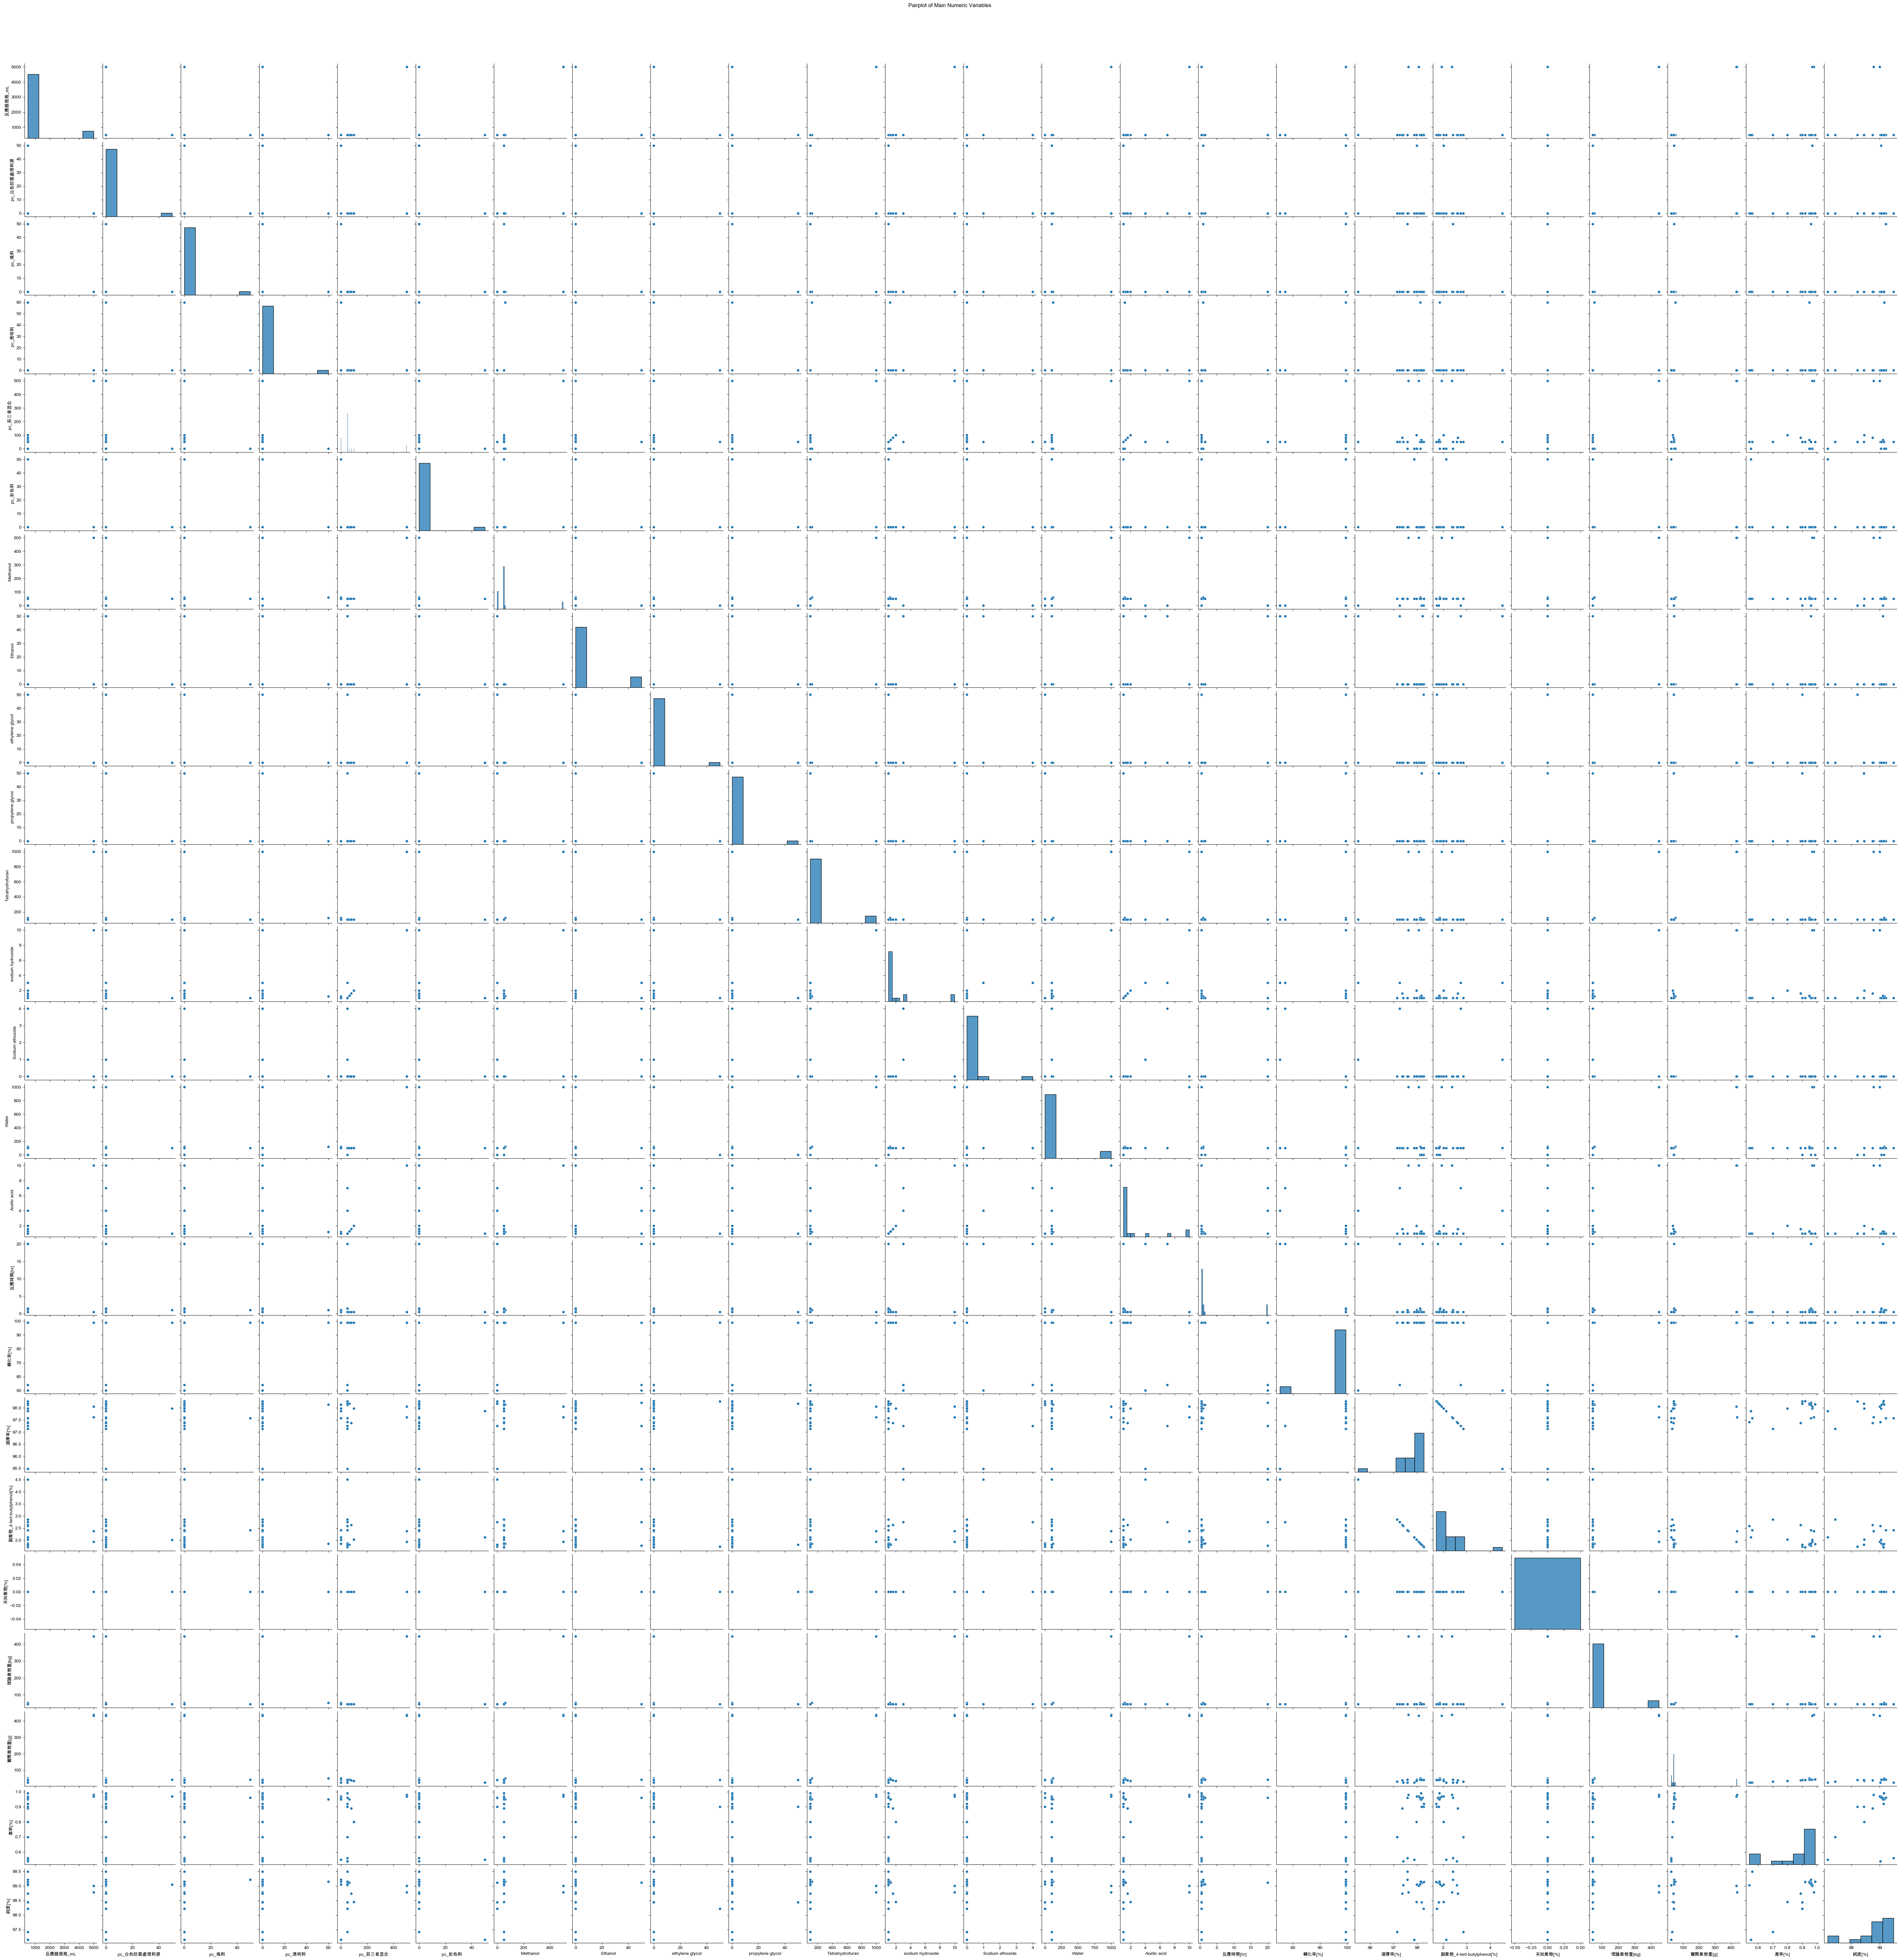

In [19]:
sns.pairplot(df_exp)
plt.suptitle("Pairplot of Main Numeric Variables", y=1.02)
plt.show()

In [20]:
fac_eda_columns = ['pc_前三者混合', 'Methanol', 'Tetrahydrofuran', 'sodium hydroxide', 'Water', 'Acetic acid ', '反應溫度[degC]', '反應時間[hr]', '轉化率[%]', '選擇率[%]', '副產物_4-tert-butylphenol[%]', '未知產物[%]', '理論產物重[kg]', '實際產物重[kg]', '產率[%]', '純度[%]']

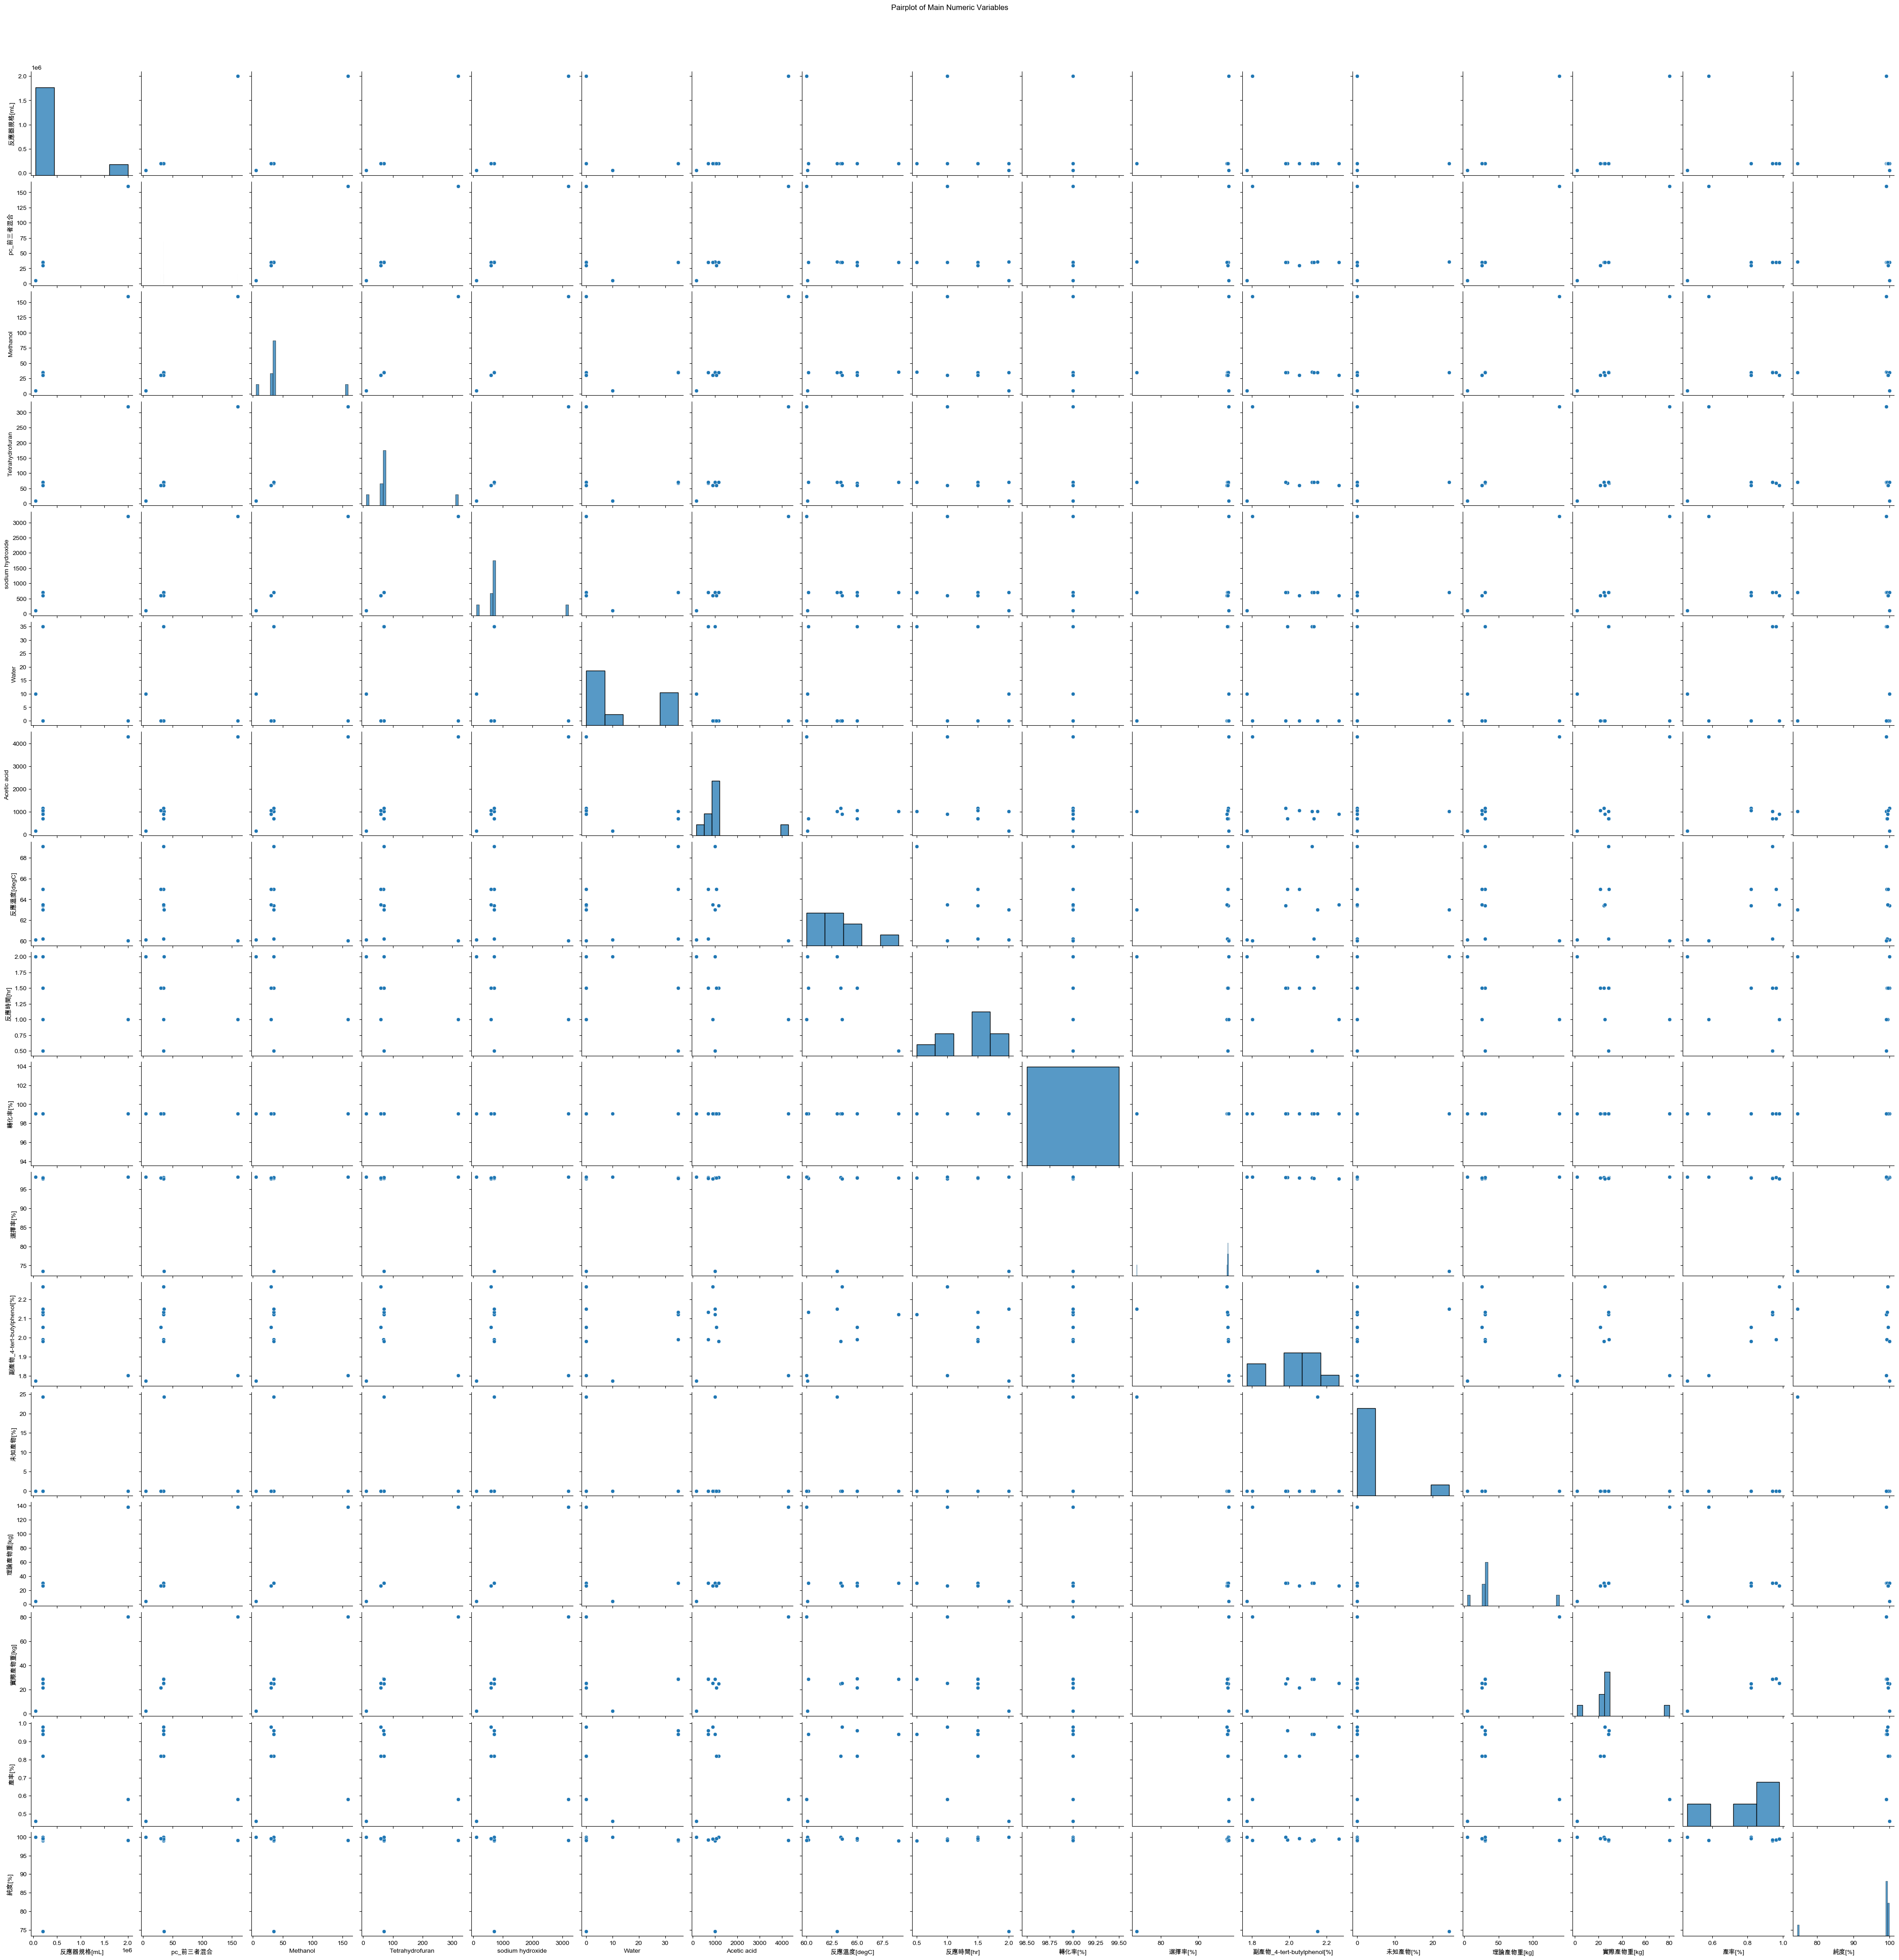

In [21]:
sns.pairplot(df_fac)
plt.suptitle("Pairplot of Main Numeric Variables", y=1.02)
plt.show()

<Axes: xlabel='副產物_4-tert-butylphenol[%]', ylabel='選擇率[%]'>

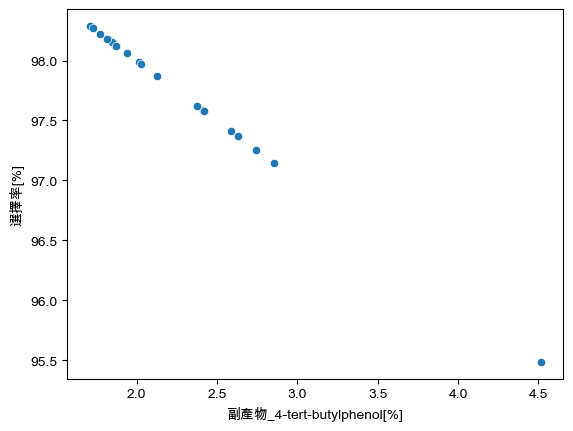

In [22]:
sns.scatterplot(data=df_exp, x="副產物_4-tert-butylphenol[%]", y="選擇率[%]")

<Axes: xlabel='反應時間[hr]', ylabel='Ethanol'>

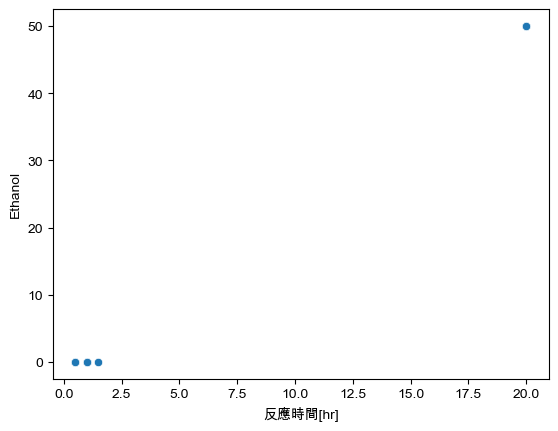

In [23]:
sns.scatterplot(data=df_exp, x="反應時間[hr]", y="Ethanol")

*Findings*:
- 4-ter-butyphenol and 選擇率[％] shows a perfect inverse proportion in the exp table, but not in the fac table. This may be due to some uncontrolled conditions present in the factory setting.

Correlation Heatmap

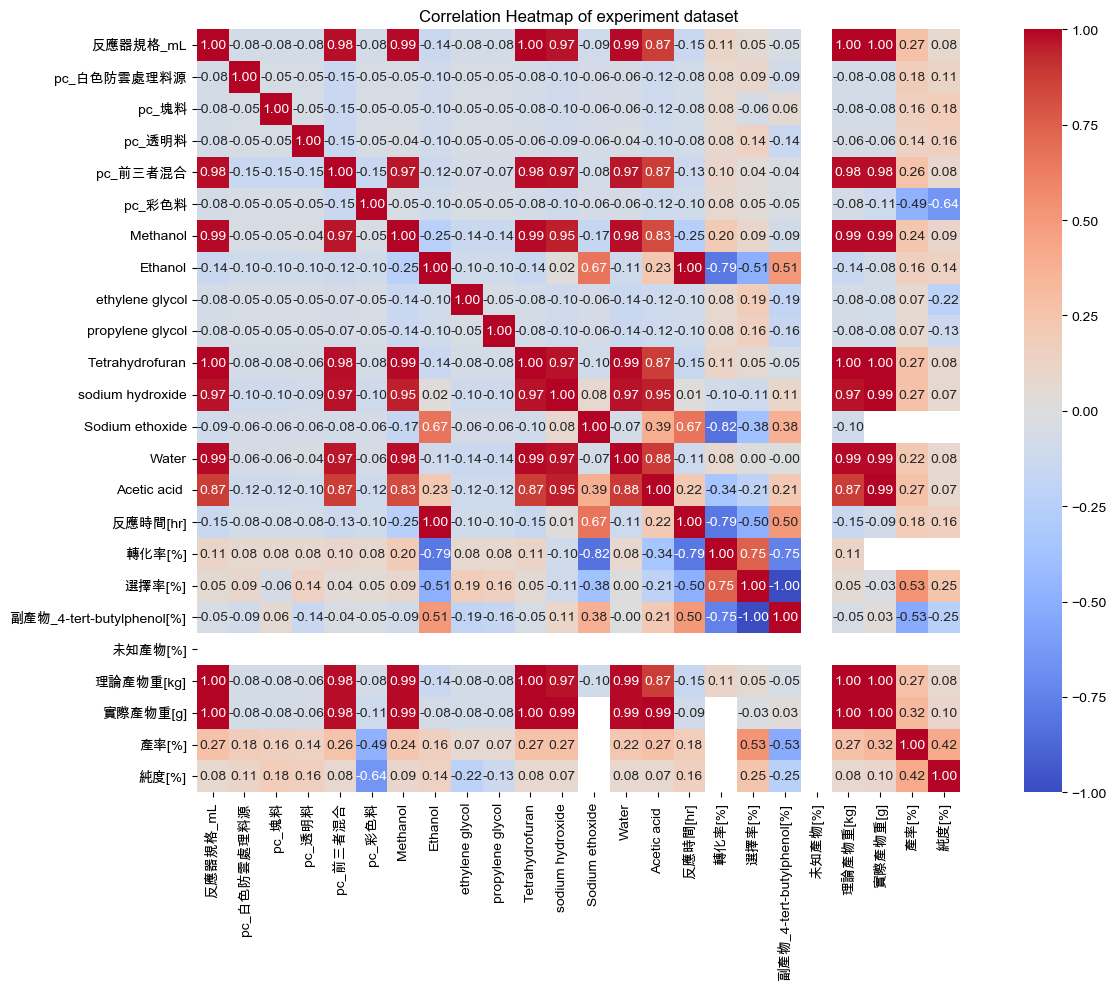

In [24]:
corr_exp = df_exp.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_exp, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of experiment dataset")
plt.tight_layout()
plt.show()

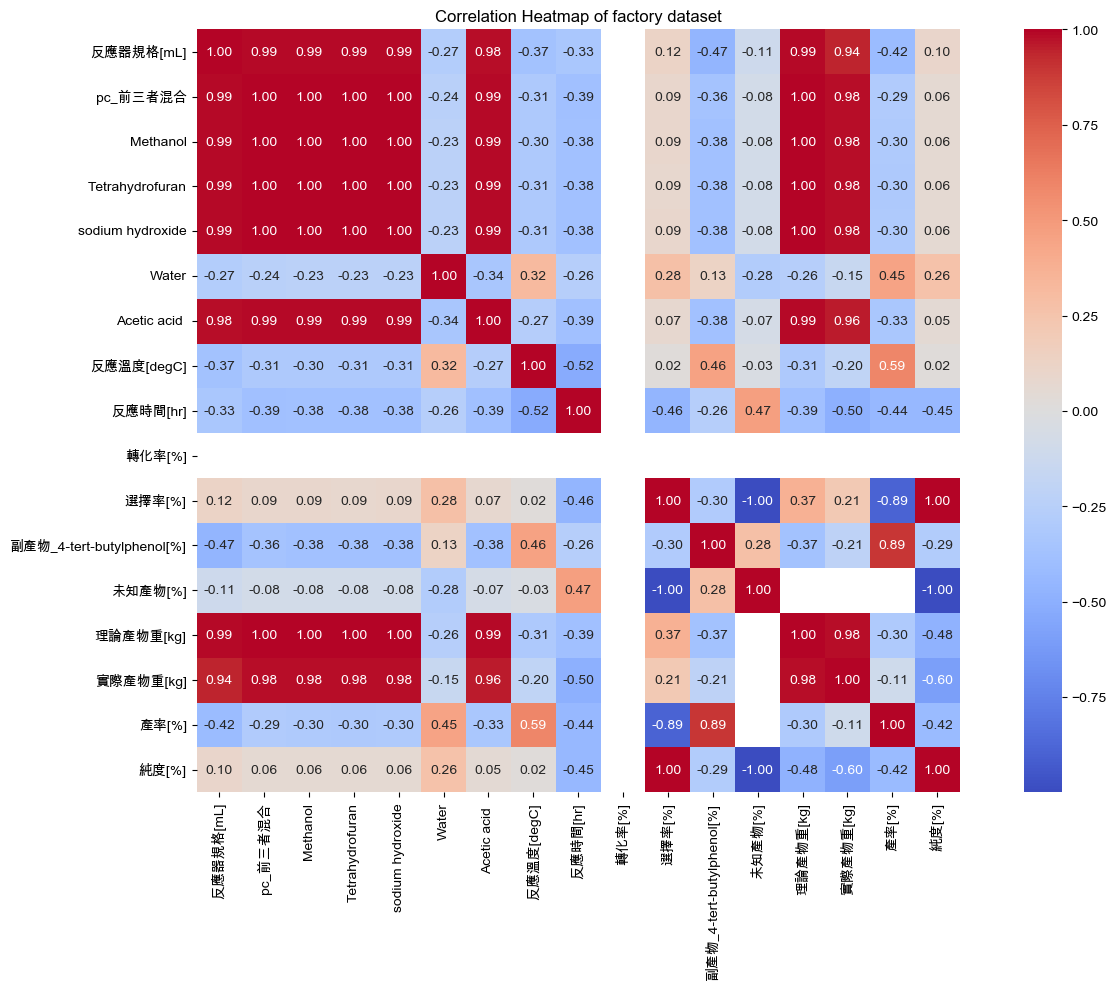

In [25]:
corr_fac = df_fac.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_fac, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of factory dataset")
plt.tight_layout()
plt.show()

*Findings*
- The correlation result of factory dataset is dominated by the amount of the feeded amount of reactant fed into the system

Principle Component Analysis (實驗參數)

In [26]:
# Standardize the numeric data
scaler_exp = StandardScaler()
scaler_fac = StandardScaler()

df_scaled_exp = scaler_exp.fit_transform(X_exp)
df_scaled_fac = scaler_fac.fit_transform(X_fac)

In [27]:
dimension_exp = 5
pca_exp = PCA(n_components = dimension_exp)

dimension_fac = 5 # row is less than col
pca_fac = PCA(n_components = dimension_fac)

transformed_arr_exp = pca_exp.fit_transform(df_scaled_exp)
pca_col_exp = [f"PC{x + 1}" for x in range(transformed_arr_exp.shape[1])]
transformed_df_exp = pd.DataFrame(transformed_arr_exp, columns=pca_col_exp)

transformed_arr_fac = pca_fac.fit_transform(df_scaled_fac)
pca_col_fac = [f"PC{x + 1}" for x in range(transformed_arr_fac.shape[1])]
transformed_df_fac = pd.DataFrame(transformed_arr_fac, columns=pca_col_fac)


In [28]:
transformed_df_exp

,PC1,PC2,PC3,PC4,PC5
0,-1.117400,-0.919045,-1.316722,-1.198381,-1.997113
1,-1.117400,-0.919045,-1.316722,-1.198381,-1.997113
2,-0.957681,-0.901259,-1.655174,-1.463471,3.605862
3,-1.170401,2.609159,-0.032229,-0.003927,-0.009250
4,-0.537868,3.463792,-0.009773,0.007696,-0.001915
5,-0.215626,5.388629,0.003495,0.040378,0.005015
6,7.767718,-0.278759,0.055512,0.008135,-0.029494
7,7.767718,-0.278759,0.055512,0.008135,-0.029494
8,-0.804418,-0.622195,0.009260,0.000445,-0.001682
9,-0.804418,-0.622195,0.009260,0.000445,-0.001682


In [29]:
contribution_ratio_exp = pca_exp.explained_variance_ratio_ # Conribution ratio
cumulative_contribution_ratio_exp = pca_exp.explained_variance_ratio_.cumsum() # Cumulative contribution ratio
pca_table_exp = pd.DataFrame(data=[contribution_ratio_exp, cumulative_contribution_ratio_exp], columns=pca_col_exp, index=['Contribution Ratio', 'Cumulative Contribution Ratio'])
print("PCA table of experiment dataset")
pca_table_exp


PCA table of experiment dataset


,PC1,PC2,PC3,PC4,PC5
Contribution Ratio,0.423738,0.176127,0.067421,0.065796,0.065794
Cumulative Contribution Ratio,0.423738,0.599865,0.667286,0.733082,0.798877


In [30]:
contribution_ratio_fac = pca_fac.explained_variance_ratio_ # Conribution ratio
cumulative_contribution_ratio_fac = pca_fac.explained_variance_ratio_.cumsum() # Cumulative contribution ratio
pca_table_fac = pd.DataFrame(data=[contribution_ratio_fac, cumulative_contribution_ratio_fac], columns=pca_col_fac, index=['Contribution Ratio', 'Cumulative Contribution Ratio'])
print("PCA table of factory dataset")
pca_table_fac

PCA table of factory dataset


,PC1,PC2,PC3,PC4,PC5
Contribution Ratio,0.698617,0.193638,0.082409,0.023753,0.001221
Cumulative Contribution Ratio,0.698617,0.892256,0.974664,0.998418,0.999639


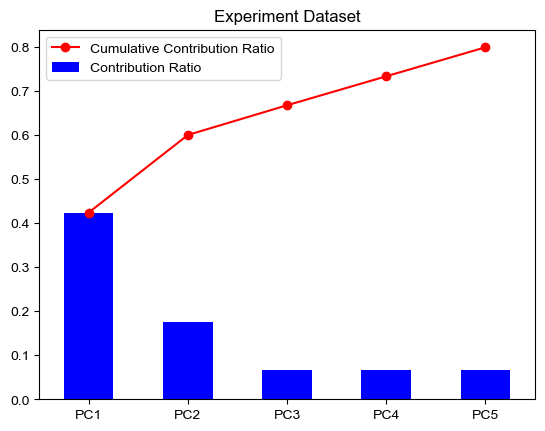

In [31]:
fig, ax = plt.subplots()
pca_table_exp.iloc[0, :].plot(kind='bar', color='blue')
pca_table_exp.iloc[1, :].plot(kind='line', marker='o', color='r')
plt.legend()
plt.title('Experiment Dataset')
plt.show()

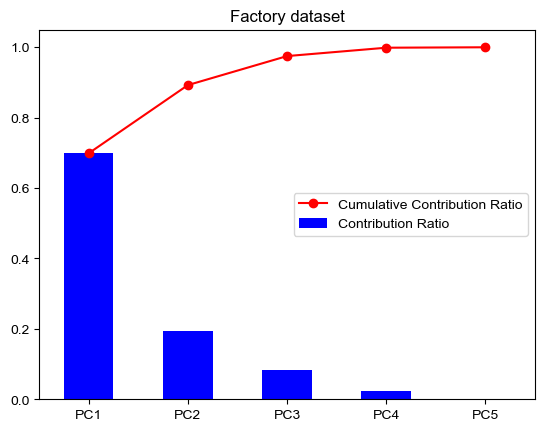

In [32]:
fig, ax = plt.subplots()
pca_table_fac.iloc[0, :].plot(kind='bar', color='blue')
pca_table_fac.iloc[1, :].plot(kind='line', marker='o', color='r')
plt.legend()
plt.title('Factory dataset')
plt.show()

Findings:
- The first two PCs are including almost 60% information of whole dataset.

Plot with PC1 and PC2

In [33]:
# Select two components
pca_exp = PCA(n_components=2)
scores_exp = pca_exp.fit_transform(df_scaled_exp)
df_pca_exp = pd.DataFrame(scores_exp, columns=['PC1', 'PC2'])

pca_fac = PCA(n_components=2)
scores_fac = pca_fac.fit_transform(df_scaled_fac)

df_pca_fac = pd.DataFrame(scores_fac, columns=['PC1', 'PC2'])

Scores plot

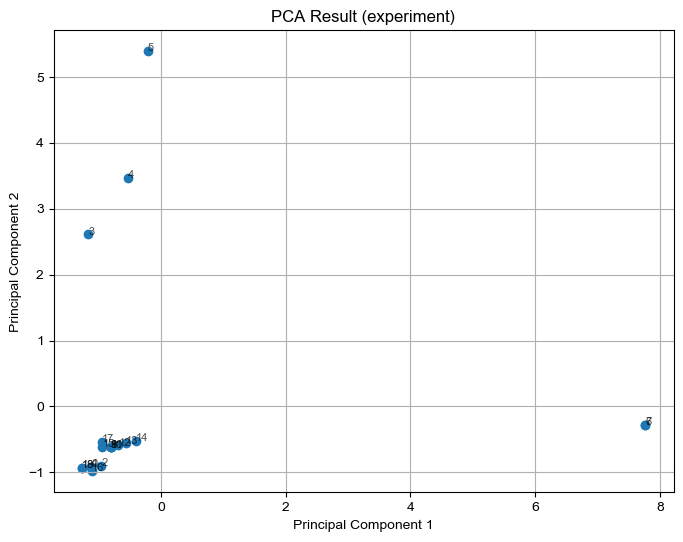

In [34]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_exp['PC1'], df_pca_exp['PC2'])

# Add the index as labels
for i, txt in enumerate(df_pca_exp.index):
    plt.text(df_pca_exp['PC1'][i], df_pca_exp['PC2'][i], str(txt), fontsize=8, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (experiment)')
plt.grid(True)
plt.show()

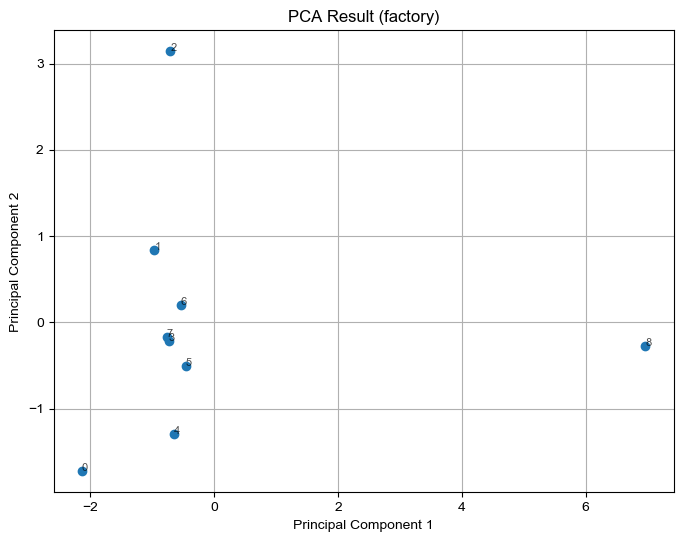

In [35]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_fac['PC1'], df_pca_fac['PC2'])

# Add the index as labels
for i, txt in enumerate(df_pca_fac.index):
    plt.text(df_pca_fac['PC1'][i], df_pca_fac['PC2'][i], str(txt), fontsize=8, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (factory)')
plt.grid(True)
plt.show()

*Findings*
- exp data: The data can be seperated to roughtly 3 groups. And sample no.7 shows different property comparing to others.
- fac data: no.8 shows different property compaing to others.

Interactive scores plot

In [36]:
# Add index to the PCA DataFrame for labeling
df_pca_exp['Index'] = df_pca_exp.index.astype(str)

fig = px.scatter(
    df_pca_exp,
    x='PC1',
    y='PC2',
    hover_name='Index',  # shows index on hover
    width=900, 
    height=900, 
    title='PCA Result (experiment) - Hover to see Index'
)

fig.show()

In [37]:
# Add index to the PCA DataFrame for labeling
df_pca_fac['Index'] = df_pca_fac.index.astype(str)

fig = px.scatter(
    df_pca_fac,
    x='PC1',
    y='PC2',
    hover_name='Index',  # shows index on hover
    width=900, 
    height=900, 
    title='PCA Result (factory) - Hover to see Index'
)

fig.show()

Loadings plot

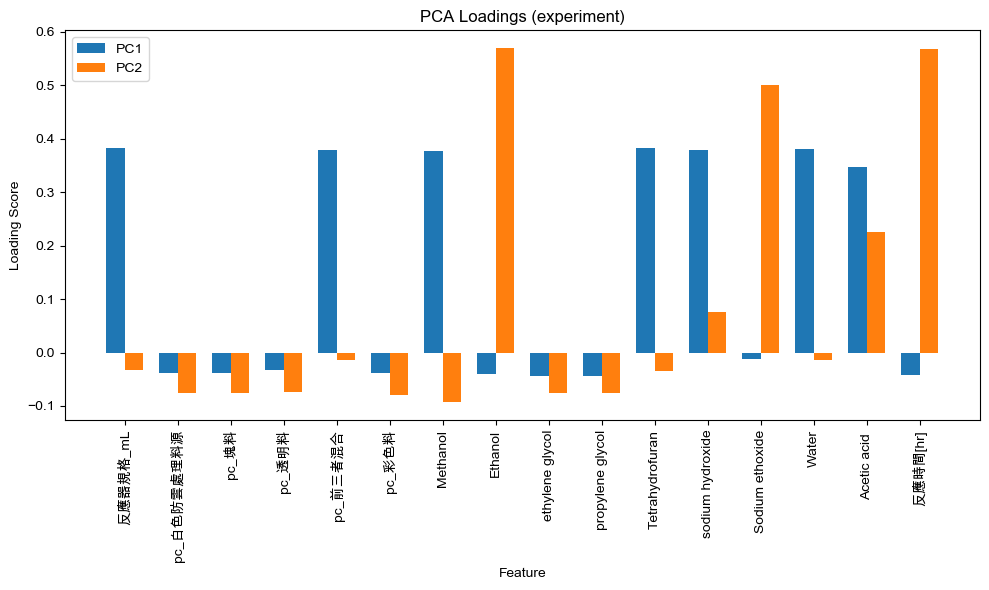

In [38]:
# Get the loadings
loadings_exp = pca_exp.components_.T  # shape: (num_features, num_components)
features_exp = X_exp.columns

# Bar plot for PC1 and PC2 loadings
plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = np.arange(len(features_exp))

plt.bar(indices, loadings_exp[:, 0], bar_width, label='PC1')
plt.bar(indices + bar_width, loadings_exp[:, 1], bar_width, label='PC2')

plt.xticks(indices + bar_width / 2, features_exp, rotation=90)
plt.ylabel('Loading Score')
plt.xlabel('Feature')
plt.title('PCA Loadings (experiment)')
plt.legend()
plt.tight_layout()
plt.show()

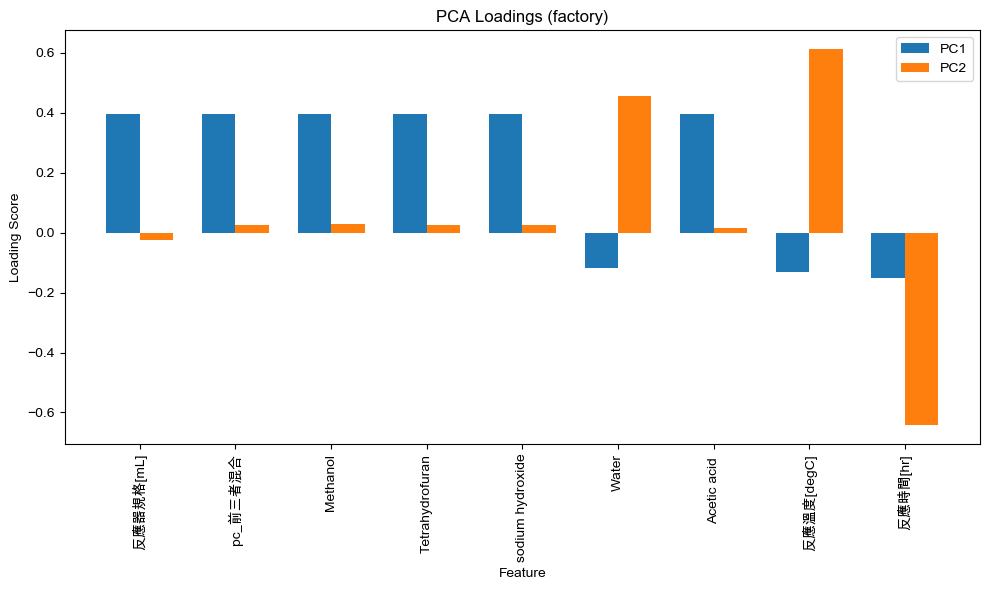

In [39]:
# Get the loadings
loadings_fac = pca_fac.components_.T  # shape: (num_features, num_components)
features_fac = X_fac.columns

# Bar plot for PC1 and PC2 loadings
plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = np.arange(len(features_fac))

plt.bar(indices, loadings_fac[:, 0], bar_width, label='PC1')
plt.bar(indices + bar_width, loadings_fac[:, 1], bar_width, label='PC2')

plt.xticks(indices + bar_width / 2, features_fac, rotation=90)
plt.ylabel('Loading Score')
plt.xlabel('Feature')
plt.title('PCA Loadings (factory)')
plt.legend()
plt.tight_layout()
plt.show()

Findings:
- loadings in feature 'Water', '反應時間' show different result comparing to exp and fac data. This might influenced by the data distribution in both datasets

Biplot

In [45]:
loadings_exp

array([[ 0.38190423, -0.03297322],
       [-0.03781066, -0.07481934],
       [-0.03781066, -0.07481934],
       [-0.03240607, -0.07337144],
       [ 0.37951687, -0.01485062],
       [-0.03768693, -0.08016134],
       [ 0.37769476, -0.09329753],
       [-0.03973549,  0.56952592],
       [-0.04305766, -0.07590099],
       [-0.04305766, -0.07590099],
       [ 0.3818029 , -0.03419552],
       [ 0.3790525 ,  0.07626522],
       [-0.01163778,  0.50021505],
       [ 0.38045763, -0.01385768],
       [ 0.34739522,  0.22462621],
       [-0.04272053,  0.56855189]])

In [47]:
scores_exp

array([[-1.1174003 , -0.91904458],
       [-1.1174003 , -0.91904458],
       [-0.95768091, -0.90125923],
       [-1.17040135,  2.60915889],
       [-0.537868  ,  3.46379209],
       [-0.21562574,  5.38862903],
       [ 7.76771788, -0.27875877],
       [ 7.76771788, -0.27875877],
       [-0.80441782, -0.62219531],
       [-0.80441782, -0.62219531],
       [-0.80441782, -0.62219531],
       [-0.80441782, -0.62219531],
       [-0.68663768, -0.59176874],
       [-0.56312847, -0.56156635],
       [-0.40545173, -0.52102249],
       [-0.94066185, -0.6172328 ],
       [-1.11374378, -0.98466313],
       [-0.94683946, -0.53501725],
       [-1.27246246, -0.93233105],
       [-1.27246246, -0.93233105]])

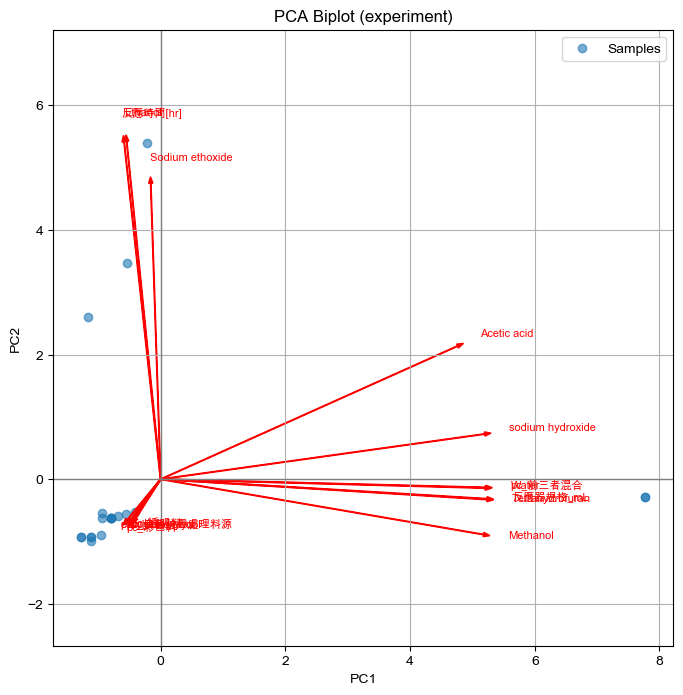

In [40]:
plt.figure(figsize=(8, 8))

# 1. Plot the sample scores (projected data points)
plt.scatter(scores_exp[:, 0], scores_exp[:, 1], alpha=0.6, label='Samples')

pc1_loading_max = loadings_exp[:, 0].max()
pc1_score_max = scores_exp[:, 0].max()
pc1_ratio = pc1_score_max / pc1_loading_max

pc2_loading_max = loadings_exp[:, 0].max()
pc2_score_max = scores_exp[:, 0].max()
pc2_ratio = pc2_score_max / pc2_loading_max

# 2. Plot the loadings as arrows
for i, feature in enumerate(features_exp):
    plt.arrow(0, 0, 
              loadings_exp[i, 0]*max(scores_exp[:,0])*1.8, loadings_exp[i, 1]*max(scores_exp[:,1])*1.8,
              color='red', width=0.01, head_width=0.07, length_includes_head=True)
    plt.text(loadings_exp[i, 0]*max(scores_exp[:,0])*1.9, 
             loadings_exp[i, 1]*max(scores_exp[:,1])*1.9, 
             feature, color='red', fontsize=8)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot (experiment)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

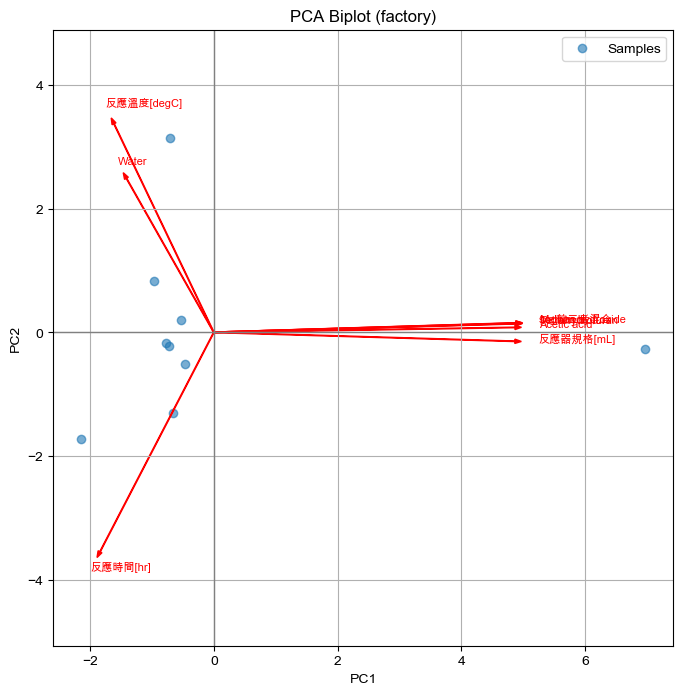

In [41]:
plt.figure(figsize=(8, 8))

# 1. Plot the sample scores (projected data points)
plt.scatter(scores_fac[:, 0], scores_fac[:, 1], alpha=0.6, label='Samples')

pc1_loading_max = loadings_fac[:, 0].max()
pc1_score_max = scores_fac[:, 0].max()
pc1_ratio = pc1_score_max / pc1_loading_max

pc2_loading_max = loadings_fac[:, 0].max()
pc2_score_max = scores_fac[:, 0].max()
pc2_ratio = pc2_score_max / pc2_loading_max

# 2. Plot the loadings as arrows
for i, feature in enumerate(features_fac):
    plt.arrow(0, 0, 
              loadings_fac[i, 0]*max(scores_fac[:,0])*1.8, loadings_fac[i, 1]*max(scores_fac[:,1])*1.8,
              color='red', width=0.01, head_width=0.07, length_includes_head=True)
    plt.text(loadings_fac[i, 0]*max(scores_fac[:,0])*1.9, 
             loadings_fac[i, 1]*max(scores_fac[:,1])*1.9, 
             feature, color='red', fontsize=8)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot (factory)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [42]:
# 1. Samples as scatter
scatter = go.Scatter(
    x=scores_exp[:, 0], y=scores_exp[:, 1],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.6),
    name='Samples',
    text=[f'Sample {i}' for i in range(df_scaled_exp.shape[0])],  # Customize as needed
    hoverinfo='text'
)

# 2. Loadings as arrows + invisible points for hover
arrow_traces = []
for i, feature in enumerate(features_exp):
    # Arrow (from origin to loading)
    arrow_traces.append(
        go.Scatter(
            x=[0, loadings_exp[i, 0]*max(scores_exp[:,0])],
            y=[0, loadings_exp[i, 1]*max(scores_exp[:,1])],
            mode='lines+markers',
            marker=dict(size=1, color='red'),
            line=dict(width=2, color='red'),
            name=feature,
            text=[None, feature],  # Only the arrow tip gets the feature name
            hoverinfo='text'
        )
    )

layout = go.Layout(
    title='Interactive PCA Biplot (experiment)',
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2'),
    showlegend=False,
    width=800, height=800
)

fig = go.Figure([scatter] + arrow_traces, layout)
fig.show()

In [43]:
# 1. Samples as scatter
scatter = go.Scatter(
    x=scores_fac[:, 0], y=scores_fac[:, 1],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.6),
    name='Samples',
    text=[f'Sample {i}' for i in range(df_scaled_fac.shape[0])],  # Customize as needed
    hoverinfo='text'
)

# 2. Loadings as arrows + invisible points for hover
arrow_traces = []
for i, feature in enumerate(features_fac):
    # Arrow (from origin to loading)
    arrow_traces.append(
        go.Scatter(
            x=[0, loadings_fac[i, 0]*max(scores_fac[:,0])],
            y=[0, loadings_fac[i, 1]*max(scores_fac[:,1])],
            mode='lines+markers',
            marker=dict(size=1, color='red'),
            line=dict(width=2, color='red'),
            name=feature,
            text=[None, feature],  # Only the arrow tip gets the feature name
            hoverinfo='text'
        )
    )

layout = go.Layout(
    title='Interactive PCA Biplot (factory)',
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2'),
    showlegend=False,
    width=800, height=800
)

fig = go.Figure([scatter] + arrow_traces, layout)
fig.show()

*Findings*
- PC1 is more related to the "The amount of reactant". 
- PC2 is more related to the "The degree of resistance to reaction"
